# 비지도학습 군집분석: 정답지가 없는 분석

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/shopping-data.csv')

In [100]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [102]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [103]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 군집분석(계층적 군집, 비계층적 군집)
* 계층적 군집
     * 비지도학습
     * 데이터가 적을 때 사용
     * 거리 계산 지표 : 유크리드, 맨하탄, 코사인 유사도
* 계층적 군집 5가지
     * 단일연결법(single linange), 최단연결법: 군집과 군집 사이에서 가장 가까운 데이터를 기준으로 묶음
     * 완전연결법(complite lingage), 최장연결법: 군집과 군집 사이에서 가장 먼 데이터를 기준으로 묶음
     * 평균연결법(average linkage): 군집과 군집 사이의 모든 데이터의 평균 데이터로 계산(이상치에 덜 민감)
     * 중심연결법(centroid linkage): 군집과 중심점 사이의 거리를 거리로 측정한 방법, 계산이 빠름
     * 와드연결법(ward linkage): 군집내 오차가 최소가 되는 데이터로 계산, 군집내 분산이 최소, 조밀한 군집
* 계층적 군집의 시각화는 덴드로그램으로 한다.

In [104]:
import scipy.cluster.hierarchy as shc

In [105]:
df = pd.get_dummies(df, drop_first=True)

In [106]:
df2 = df.copy()

In [107]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,True
1,2,21,15,81,True
2,3,20,16,6,False
3,4,23,16,77,False
4,5,31,17,40,False
...,...,...,...,...,...
195,196,35,120,79,False
196,197,45,126,28,False
197,198,32,126,74,True
198,199,32,137,18,True


In [108]:
df = df.drop('CustomerID', axis=1)
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False
...,...,...,...,...
195,35,120,79,False
196,45,126,28,False
197,32,126,74,True
198,32,137,18,True


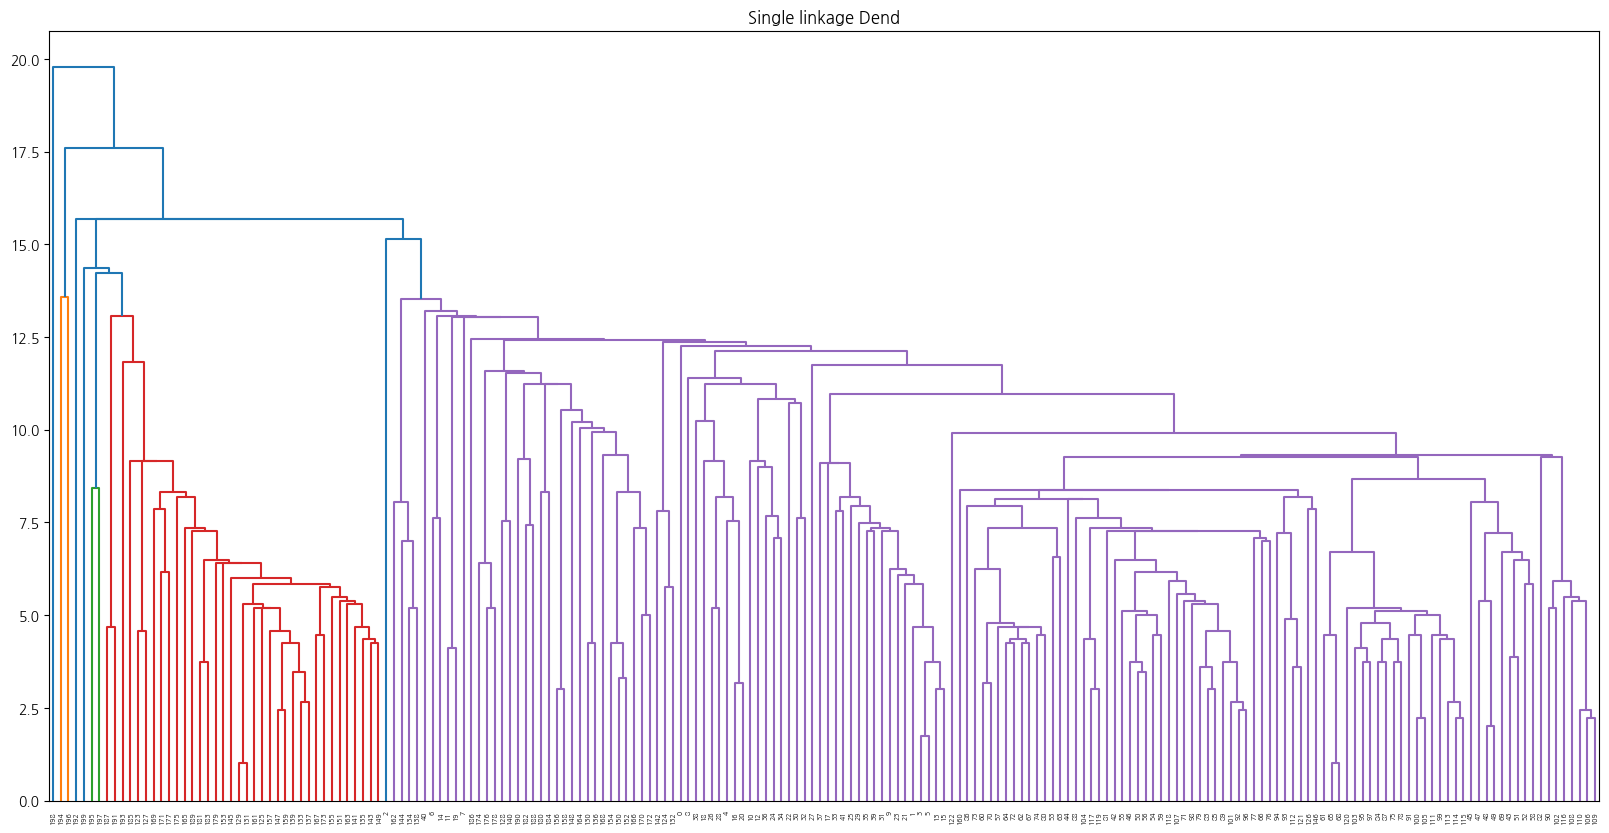

In [110]:
plt.figure(figsize=(20,10))
plt.title('Single linkage Dend')
dend = shc.dendrogram(shc.linkage(df, method= 'single'))
plt.show()

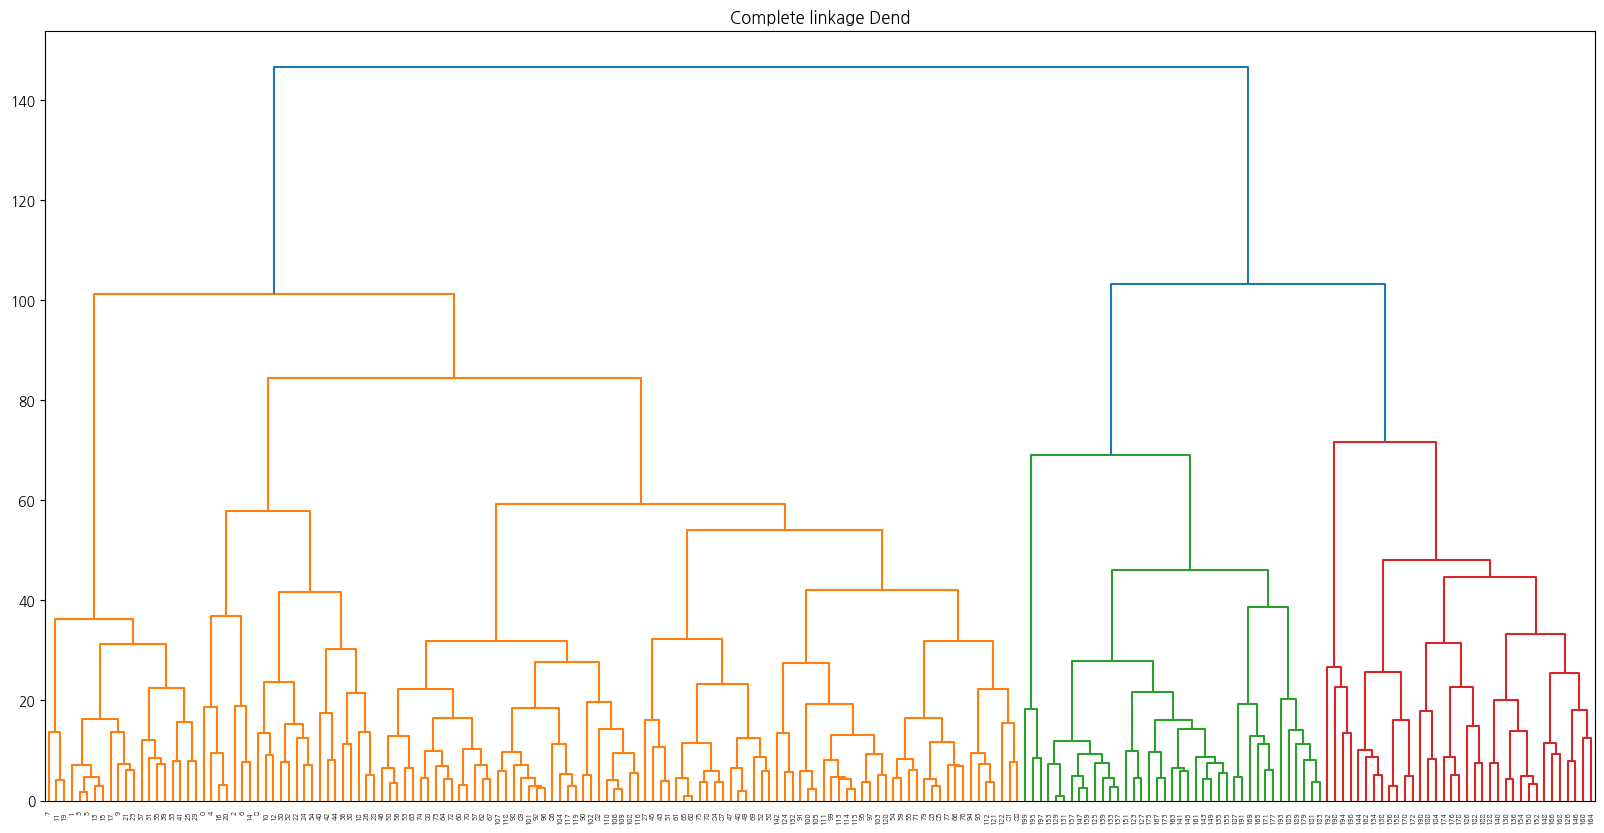

In [111]:
plt.figure(figsize=(20,10))
plt.title('Complete linkage Dend')
dend = shc.dendrogram(shc.linkage(df, method= 'complete'))
plt.show()

평균연결법

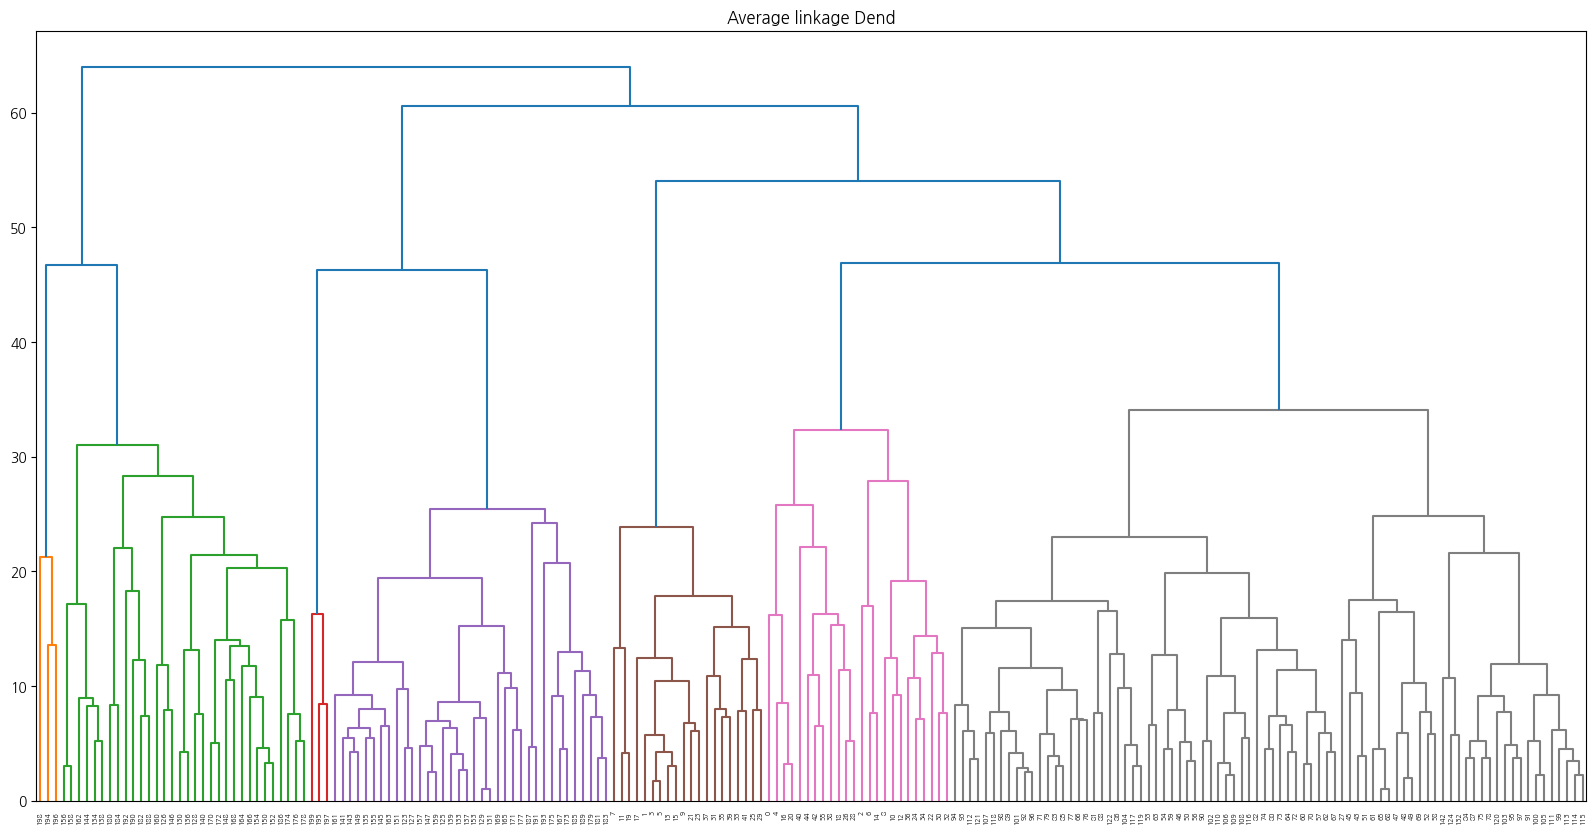

In [112]:
plt.figure(figsize=(20,10))
plt.title('Average linkage Dend')
dend = shc.dendrogram(shc.linkage(df, method= 'average'))
plt.show()

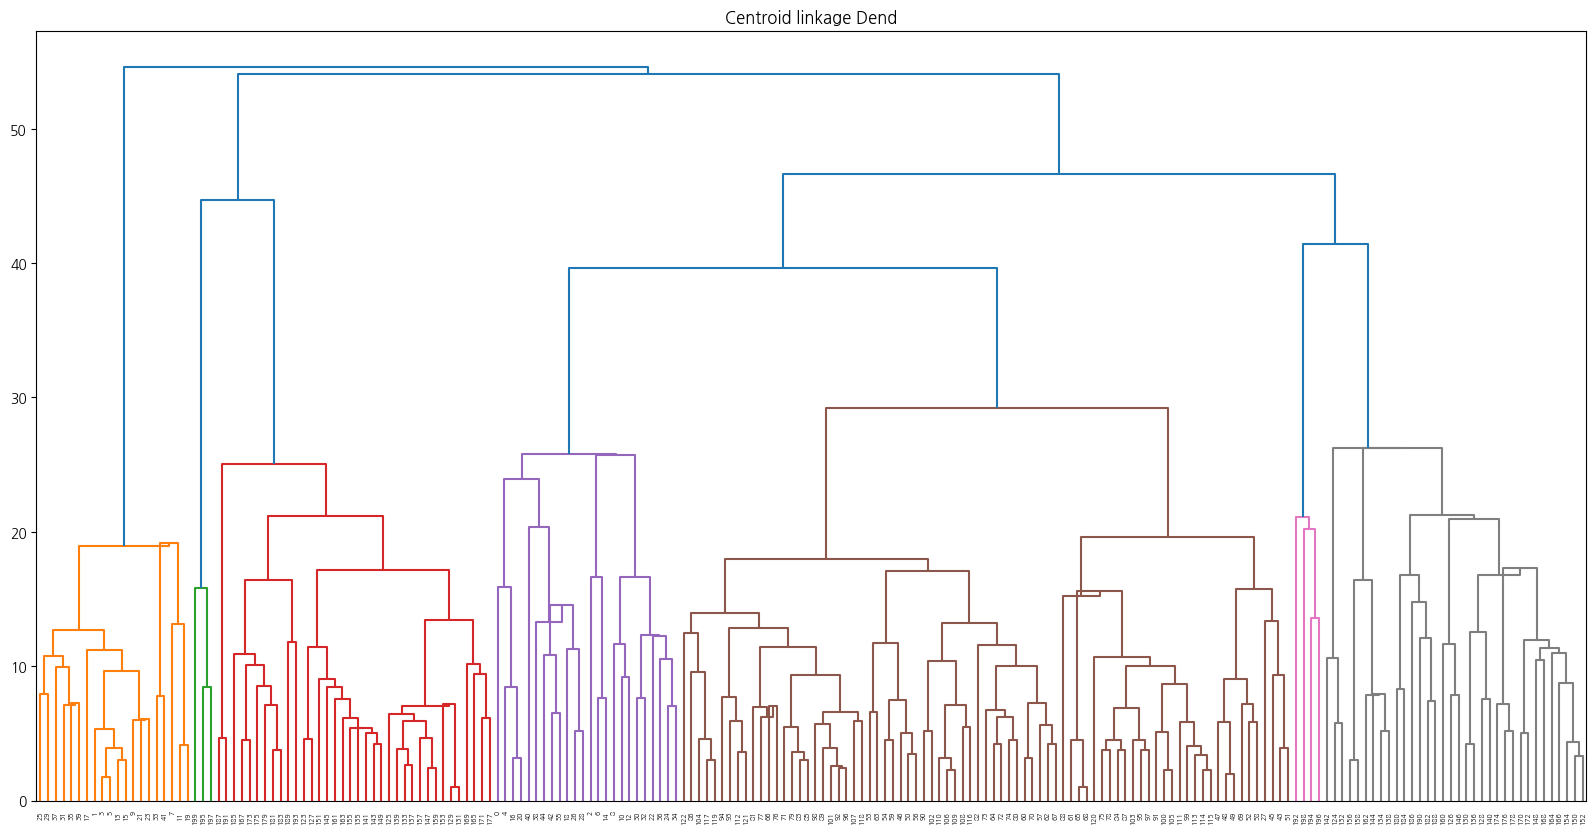

In [113]:
plt.figure(figsize=(20,10))
plt.title('Centroid linkage Dend')
dend = shc.dendrogram(shc.linkage(df, method= 'centroid'))
plt.show()

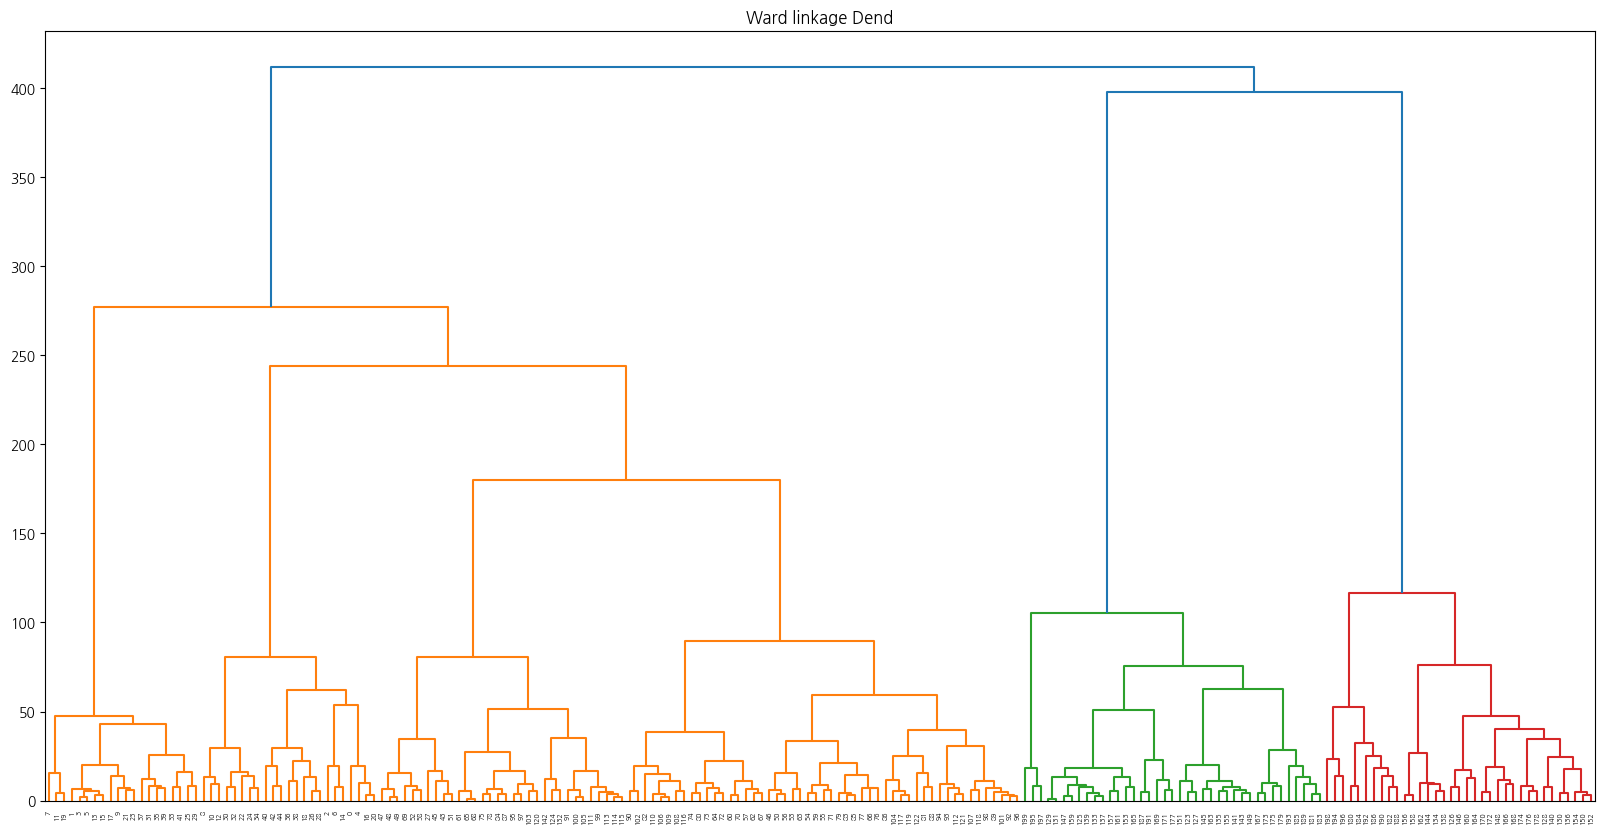

In [114]:
plt.figure(figsize=(20,10))
plt.title('Ward linkage Dend')
dend = shc.dendrogram(shc.linkage(df, method= 'ward'))
plt.show()

In [115]:
from sklearn.cluster import AgglomerativeClustering

In [116]:
Single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage= 'single')
result = Single.fit_predict(df)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 0])

In [20]:
df2['single'] = result 
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single
0,1,19,15,39,True,0
1,2,21,15,81,True,0
2,3,20,16,6,False,0
3,4,23,16,77,False,0
4,5,31,17,40,False,0
...,...,...,...,...,...,...
195,196,35,120,79,False,0
196,197,45,126,28,False,2
197,198,32,126,74,True,0
198,199,32,137,18,True,1


In [22]:
Average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage= 'average')
result = Average.fit_predict(df)
df2['average'] = result 
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average
0,1,19,15,39,True,0,0
1,2,21,15,81,True,0,0
2,3,20,16,6,False,0,0
3,4,23,16,77,False,0,0
4,5,31,17,40,False,0,0
...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2
196,197,45,126,28,False,2,1
197,198,32,126,74,True,0,2
198,199,32,137,18,True,1,1


In [23]:
ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage= 'ward')
result = ward.fit_predict(df)
df2['ward'] = result 
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
0,1,19,15,39,True,0,0,0
1,2,21,15,81,True,0,0,0
2,3,20,16,6,False,0,0,0
3,4,23,16,77,False,0,0,0
4,5,31,17,40,False,0,0,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,False,0,2,2
196,197,45,126,28,False,2,1,1
197,198,32,126,74,True,0,2,2
198,199,32,137,18,True,1,1,1


In [29]:
df2[df2['average'] == 1]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
126,127,43,71,35,True,0,1,1
128,129,59,71,11,True,0,1,1
130,131,47,71,9,True,0,1,1
134,135,20,73,5,True,0,1,1
136,137,44,73,7,False,0,1,1
138,139,19,74,10,True,0,1,1
140,141,57,75,5,False,0,1,1
144,145,25,77,12,True,0,1,1
146,147,48,77,36,True,0,1,1
148,149,34,78,22,False,0,1,1


In [30]:
df2[df2['average'] == 0]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,single,average,ward
0,1,19,15,39,True,0,0,0
1,2,21,15,81,True,0,0,0
2,3,20,16,6,False,0,0,0
3,4,23,16,77,False,0,0,0
4,5,31,17,40,False,0,0,0
...,...,...,...,...,...,...,...,...
121,122,38,67,40,False,0,0,0
122,123,40,69,58,False,0,0,0
124,125,23,70,29,False,0,0,0
132,133,25,72,34,False,0,0,0


# 비계층적 군집 - 데이터 수가 많을 때 사용
* k-means(k: 평균 군집 ):거리를 기반으로 군집을 형성, 이상치에 민감함.
* StandardScaler를 사용 데이터에 이상치에 있으면 RobusterScale
* 평균이 아닌 중앙값을 이용해서 군집 형성

In [117]:
df = pd.read_csv('./data/06고객이탈예측.csv', encoding='cp949')  # 또는 encoding='euc-kr'
df.head()

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   회원ID        7043 non-null   object 
 1   성별          7043 non-null   object 
 2   고연령         7043 non-null   int64  
 3   배우자         7043 non-null   object 
 4   피부양자        7043 non-null   object 
 5   가입기간        7043 non-null   int64  
 6   전화서비스       7043 non-null   object 
 7   2회선이상       7043 non-null   object 
 8   인터넷서비스      7043 non-null   object 
 9   온라인보안       7043 non-null   object 
 10  온라인백업       7043 non-null   object 
 11  기기보호서비스     7043 non-null   object 
 12  기술지원        7043 non-null   object 
 13  스트리밍TV      7043 non-null   object 
 14  스트리밍Movies  7043 non-null   object 
 15  약정옵션        7043 non-null   object 
 16  온라인고지서      7043 non-null   object 
 17  지불수단        7043 non-null   object 
 18  월요금         7043 non-null   float64
 19  합산요금        7043 non-null  

In [119]:
df.describe()

,고연령,가입기간,월요금
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [120]:
df.isna().sum()

회원ID          0
성별            0
고연령           0
배우자           0
피부양자          0
가입기간          0
전화서비스         0
2회선이상         0
인터넷서비스        0
온라인보안         0
온라인백업         0
기기보호서비스       0
기술지원          0
스트리밍TV        0
스트리밍Movies    0
약정옵션          0
온라인고지서        0
지불수단          0
월요금           0
합산요금          0
이탈여부          0
dtype: int64

<Axes: ylabel='고연령'>

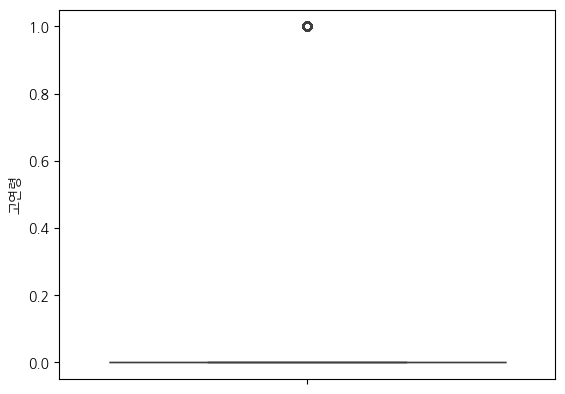

In [122]:
sns.boxplot(df['고연령'])

In [123]:
df2 = df.copy()

In [125]:
df = df.drop('회원ID', axis=1)
df


,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [39]:
df.plt(kind='box')

AttributeError: 'DataFrame' object has no attribute 'plt'

In [36]:
df2 = df.copy()

In [ ]:
for i in df['합산요금']:
    

In [43]:
df['합산요금'].str.strip().str.replace(" ", "0").str.replace("", "0")

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: 합산요금, Length: 7043, dtype: object

In [126]:
df['합산요금'] = df['합산요금'].replace(" ", "0").replace("", "0").astype('float') 

In [127]:
df['합산요금'].apply(lambda x: x.strip().replace("","0"))

AttributeError: 'float' object has no attribute 'strip'

In [128]:
df['합산요금'].astype('int') 

0         29
1       1889
2        108
3       1840
4        151
        ... 
7038    1990
7039    7362
7040     346
7041     306
7042    6844
Name: 합산요금, Length: 7043, dtype: int64

In [129]:
num_cols = df[['가입기간', '월요금', '합산요금']]
cat_cols = df.drop(['가입기간', '월요금', '합산요금'], axis=1)

In [130]:
num_cols.columns

Index(['가입기간', '월요금', '합산요금'], dtype='object')

In [131]:
cat_cols.columns

Index(['성별', '고연령', '배우자', '피부양자', '전화서비스', '2회선이상', '인터넷서비스', '온라인보안',
       '온라인백업', '기기보호서비스', '기술지원', '스트리밍TV', '스트리밍Movies', '약정옵션', '온라인고지서',
       '지불수단', '이탈여부'],
      dtype='object')

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
ss = StandardScaler()
ss_cols = ss.fit_transform(num_cols)
ss_cols = pd.DataFrame(ss_cols, columns=num_cols.columns, index=num_cols.index)
ss_cols 

,가입기간,월요금,합산요금
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874
...,...,...,...
7038,-0.340876,0.665992,-0.127605
7039,1.613701,1.277533,2.242606
7040,-0.870241,-1.168632,-0.852932
7041,-1.155283,0.320338,-0.870513


In [140]:
ss_data =  pd.concat([cat_cols,ss_cols], axis=1)
ss_data

,성별,고연령,배우자,피부양자,전화서비스,2회선이상,인터넷서비스,온라인보안,온라인백업,기기보호서비스,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,이탈여부,가입기간,월요금,합산요금
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,-1.277445,-1.160323,-0.992611
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0.066327,-0.259629,-0.172165
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.236724,-0.362660,-0.958066
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0.514251,-0.746535,-0.193672
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,-1.236724,0.197365,-0.938874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,-0.340876,0.665992,-0.127605
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,1.613701,1.277533,2.242606
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,-0.870241,-1.168632,-0.852932
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,-1.155283,0.320338,-0.870513


In [141]:
ss_data = pd.get_dummies(ss_data, drop_first=True)
ss_data

,고연령,가입기간,월요금,합산요금,성별_Male,배우자_Yes,피부양자_Yes,전화서비스_Yes,2회선이상_No phone service,2회선이상_Yes,...,스트리밍TV_Yes,스트리밍Movies_No internet service,스트리밍Movies_Yes,약정옵션_One year,약정옵션_Two year,온라인고지서_Yes,지불수단_Credit card (automatic),지불수단_Electronic check,지불수단_Mailed check,이탈여부_Yes
0,0,-1.277445,-1.160323,-0.992611,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,0.066327,-0.259629,-0.172165,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,-1.236724,-0.362660,-0.958066,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,0.514251,-0.746535,-0.193672,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,-1.236724,0.197365,-0.938874,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,True,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,0,1.613701,1.277533,2.242606,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,0,-0.870241,-1.168632,-0.852932,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,1,-1.155283,0.320338,-0.870513,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


kmeans로 군집 분석하기

In [138]:
from sklearn.cluster import KMeans

In [142]:
km = KMeans(random_state=42)
km.fit(ss_data)
result = km.labels_
result

array([7, 5, 7, ..., 7, 2, 1], dtype=int32)

In [143]:
df2['cluster'] = result
df2

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,7
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,7
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,5
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,5
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,7
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,2


In [144]:
df2['cluster'].value_counts()

cluster
2    1356
7     994
4     910
6     893
1     863
5     780
3     633
0     614
Name: count, dtype: int64

In [145]:
df2[df2['cluster']==0]['이탈여부'].value_counts()

이탈여부
No     600
Yes     14
Name: count, dtype: int64

In [147]:
df2[df2['cluster']==0]

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,cluster
23,3638-WEABW,Female,0,Yes,No,58,Yes,Yes,DSL,No,...,Yes,No,No,Two year,Yes,Credit card (automatic),59.90,3505.1,No,0
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No,0
41,9489-DEDVP,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,...,No,Yes,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No,0
43,4671-VJLCL,Female,0,No,No,63,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Credit card (automatic),79.85,4861.45,No,0
48,7639-LIAYI,Male,0,No,No,52,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),79.75,4217.8,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982,8468-FZTOE,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,...,Yes,No,Yes,Two year,Yes,Electronic check,74.35,5237.4,No,0
6995,7164-BPTUT,Male,0,No,Yes,57,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No,0
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No,0
7012,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No,0


In [148]:
df2[df2['cluster']==1]

,회원ID,성별,고연령,배우자,피부양자,가입기간,전화서비스,2회선이상,인터넷서비스,온라인보안,...,기술지원,스트리밍TV,스트리밍Movies,약정옵션,온라인고지서,지불수단,월요금,합산요금,이탈여부,cluster
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,1
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,1
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,1
35,6234-RAAPL,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.7,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,7203-OYKCT,Male,0,No,No,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Electronic check,104.95,7544.3,No,1
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No,1
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1


In [149]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(ss_data)
result = km.labels_
df2['cluster']= result

In [150]:
df2[df2['cluster']==0]['월요금'].describe()

count    1526.000000
mean       21.079194
std         2.164221
min        18.250000
25%        19.700000
50%        20.150000
75%        20.900000
max        26.900000
Name: 월요금, dtype: float64

In [151]:
df2[df2['cluster']==1]['월요금'].describe()

count    2274.000000
mean       89.322933
std        17.830285
min        35.700000
25%        78.750000
50%        92.775000
75%       104.100000
max       118.750000
Name: 월요금, dtype: float64

In [152]:
df2[df2['cluster']==2]['월요금'].describe()

count    3243.000000
mean       68.094172
std        20.227439
min        23.450000
25%        50.950000
50%        70.450000
75%        84.350000
max       112.950000
Name: 월요금, dtype: float64

In [153]:
df2['이탈여부'].value_counts()

이탈여부
No     5174
Yes    1869
Name: count, dtype: int64

# 군집의 최적개수 정하기
* elvow method
* 실루엣 지수

* 군집분석의 응집도(요소들이 얼마나 모여있는지 판단하는 지표)
   * inertia_ 값이 작을수록 군집이 잘 형성됨
* elbow method: inertia_(응집도)를 출력하고 시각화 한 뒤 응집도의 감소폭이 급격한 변화가 시작되는 지점을 최적 군집의 수로 채택하는 방법

In [154]:
print(km.inertia_ ) 

31994.01479862794


In [155]:

inertia = []
for i in range(1, 21):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(ss_data)
    inertia.append(km.inertia_)
inertia

[59078.31023711481,
 43374.18243887565,
 31994.01479862794,
 29339.875639339334,
 27584.62909384849,
 26444.329679554132,
 25749.759028719087,
 24209.80005060706,
 23690.381065814323,
 23081.547108557294,
 22527.917241701063,
 22138.29380245032,
 21836.915733081376,
 21580.902381005537,
 21422.294891378926,
 21162.378510349798,
 20835.701505507994,
 20670.210044736676,
 20445.13804824325,
 20299.48953293274]

In [156]:
inertia

[59078.31023711481,
 43374.18243887565,
 31994.01479862794,
 29339.875639339334,
 27584.62909384849,
 26444.329679554132,
 25749.759028719087,
 24209.80005060706,
 23690.381065814323,
 23081.547108557294,
 22527.917241701063,
 22138.29380245032,
 21836.915733081376,
 21580.902381005537,
 21422.294891378926,
 21162.378510349798,
 20835.701505507994,
 20670.210044736676,
 20445.13804824325,
 20299.48953293274]

엘보우 메소드로 계산한 최적 군집수는 3개

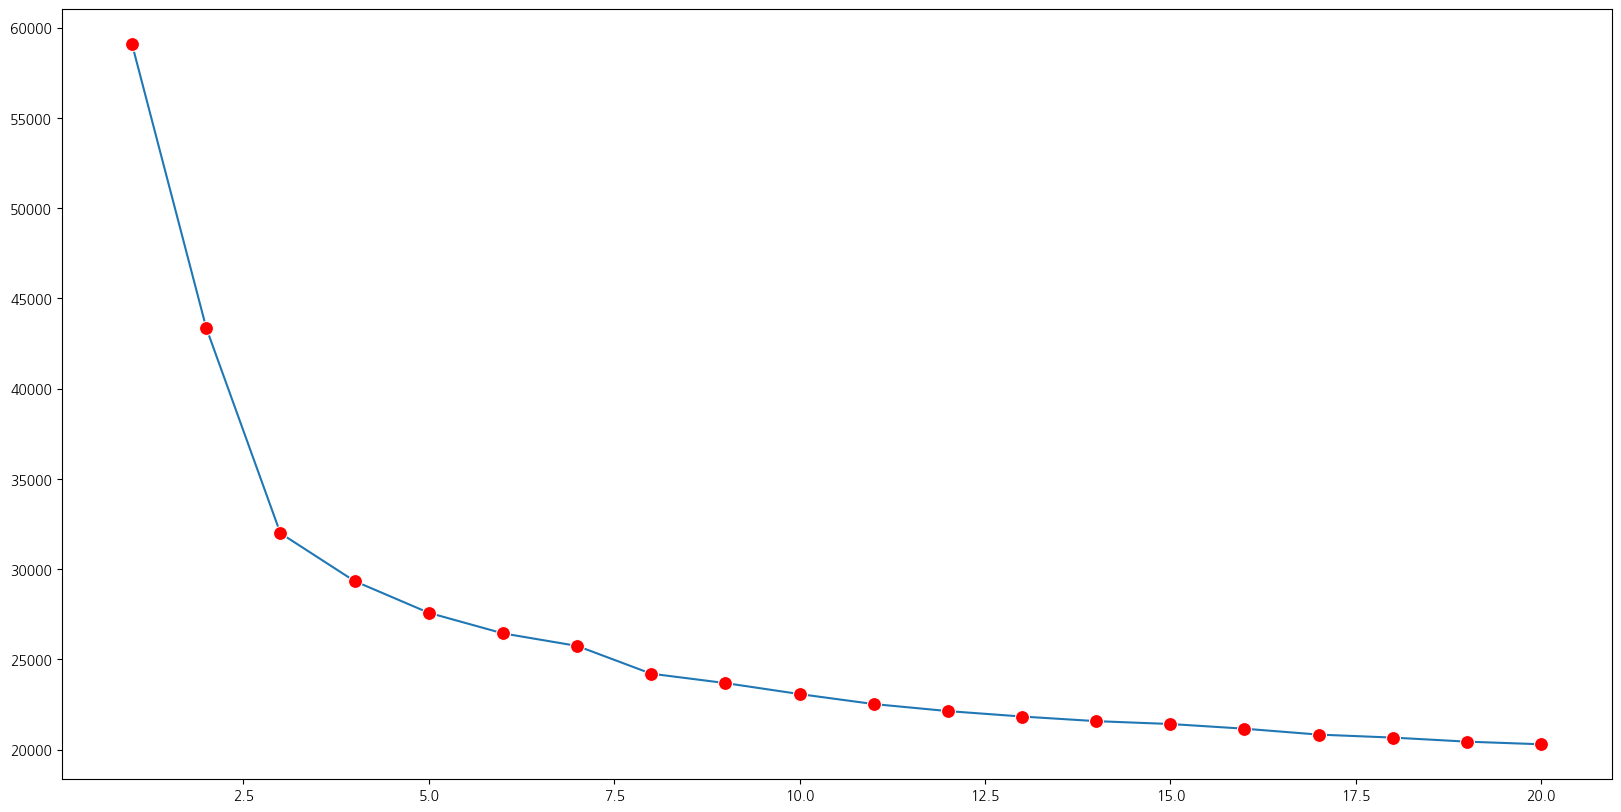

In [158]:

plt.figure(figsize=(20,10))
sns.lineplot(x=range(1, 21), y=inertia, marker='o', markersize=10, markerfacecolor='red')
plt.show()


군집도가 팔처럼 급격하게 꺾일 때 최적군집의 수라고 판단할 수 있다.

* 실루엣 지수를 출력해서 최적 군집개수 구하기
* 실루엣 지수를 구하기 위해서는 최소 2개 이상의 군집이 필요
* 실루엣 점수가 가장 가장 높은 클러스터 개수가 최적 군집 개수 (1에 가까울수록 좋음)

In [159]:
from sklearn.metrics import silhouette_score

In [161]:

sil_scores = []
for i in range(2, 21):
    km2 = KMeans(n_clusters=i, random_state=42)
    km2.fit(ss_data)
    lables = km2.labels_
    sil_scores.append(silhouette_score(ss_data, lables))
sil_scores



[np.float64(0.23114136530579368),
 np.float64(0.27954025753614337),
 np.float64(0.22605560326074733),
 np.float64(0.2021422364039757),
 np.float64(0.18454819485404939),
 np.float64(0.17404251855761246),
 np.float64(0.15134167054930486),
 np.float64(0.14304983730701998),
 np.float64(0.13725380808787682),
 np.float64(0.13613024625923187),
 np.float64(0.13410651910318933),
 np.float64(0.12859599044872772),
 np.float64(0.12894604831287032),
 np.float64(0.12553613112548406),
 np.float64(0.1255466063535535),
 np.float64(0.10710426927405747),
 np.float64(0.10674088444429676),
 np.float64(0.10699167305892061),
 np.float64(0.10612507294732001)]

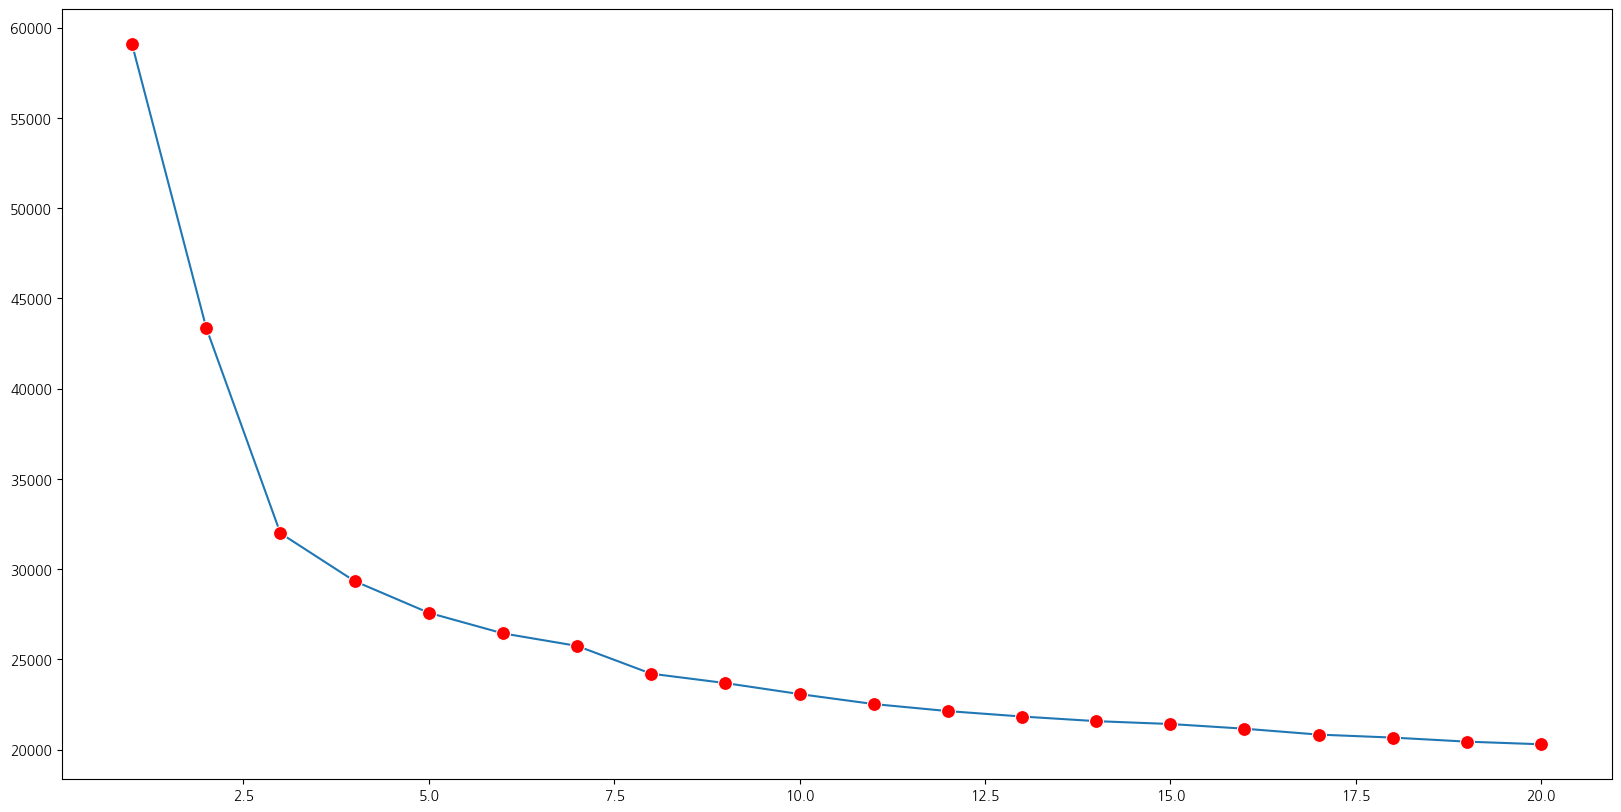

In [162]:

plt.figure(figsize=(20,10))
sns.lineplot(x=range(1, 21), y=inertia, marker='o', markersize=10, markerfacecolor='red')
plt.show()